In [74]:
from netCDF4 import Dataset
import scipy.signal as sig
import numpy as np
import matplotlib.pyplot as plt
import gsw
%matplotlib inline

In [75]:
filepath = '/work/aes/projects/offline_online_comparison/OM4_05/transport_fields/'
gridpath = '/archive/aes/projects/offline_online_comparison/ocean_annual.static.nc'
file_1day = filepath + '02050101.sum_1day_woa09.nc'
file_5day = filepath + '01010101.sum_5day_woa09.nc'
lat = Dataset(gridpath).variables['yh'][:]
lon = Dataset(gridpath).variables['xh'][:]

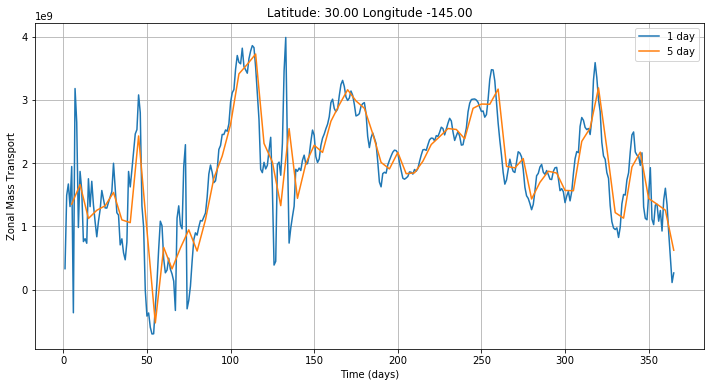

In [128]:
plotlat = 30; plotlon = -145; layidx = 6
latidx = np.argmin(np.abs(lat-plotlat))
lonidx = np.argmin(np.abs(lon-plotlon))
uh_1day = Dataset(file_1day).variables['uhtr_sum'][:,layidx,latidx,lonidx]
uh_5day = Dataset(file_5day).variables['uhtr_sum'][:,layidx,latidx,lonidx]
vh_1day = Dataset(file_1day).variables['vhtr_sum'][:,layidx,latidx,lonidx]
vh_5day = Dataset(file_5day).variables['vhtr_sum'][:,layidx,latidx,lonidx]
t_1day = np.arange(0,365) + 1
t_5day = np.arange(0,365,5) + 5
# Plot average daily transport from 1 day and 5 day fields
plt.figure(figsize=(12,6))
plt.plot(t_1day,uh_1day,'-',label='1 day')
plt.plot(t_5day,uh_5day/5,label='5 day')
plt.legend()
plt.xlabel('Time (days)')
plt.grid()
plt.title('Latitude: %.2f Longitude %.2f' % (plotlat,plotlon))
plt.ylabel('Zonal Mass Transport')
plt.show()

/local/home/miniconda3/lib/python3.6/site-packages/scipy/signal/spectral.py:1637: UserWarning: nperseg = 256 is greater than input length  = 200, using nperseg = 200
  .format(nperseg, input_length))
/local/home/miniconda3/lib/python3.6/site-packages/scipy/signal/spectral.py:1637: UserWarning: nperseg = 256 is greater than input length  = 40, using nperseg = 40
  .format(nperseg, input_length))


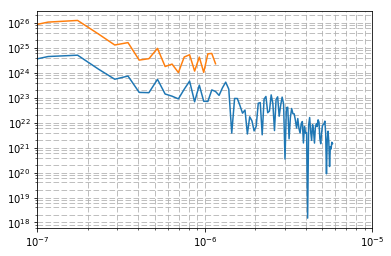

In [129]:
# Calculate spectra of 1 day and 5 day 
f_1day, Pxx_1day = sig.welch(sig.detrend(uh_1day[0:200]), fs=1./86400.)
plt.loglog(f_1day,Pxx_1day)
f_5day, Pxx_5day = sig.welch(sig.detrend(uh_5day[0:40]), fs=1./(5.*86400))
plt.loglog(f_5day,Pxx_5day)
plt.xlim((1.e-7,1.e-5))
plt.grid(True, which="both", ls="--")

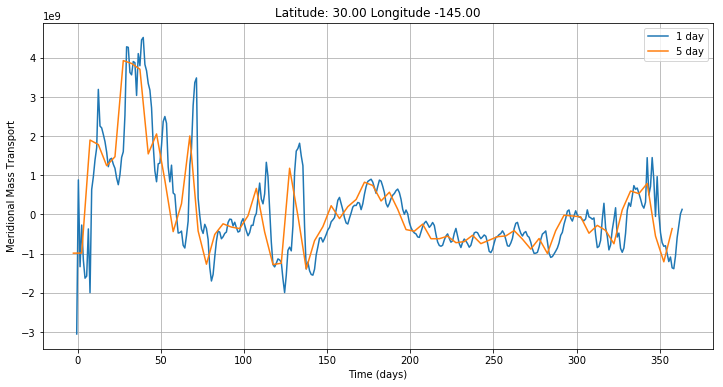

In [139]:
vh_1day = Dataset(file_1day).variables['vhtr_sum'][:,layidx,latidx,lonidx]
vh_5day = Dataset(file_5day).variables['vhtr_sum'][:,layidx,latidx,lonidx]
t_1day = np.arange(0,365) - 0.5
t_5day = np.arange(0,365,5) - 2.5
# Plot average daily transport from 1 day and 5 day fields
plt.figure(figsize=(12,6))
plt.plot(t_1day,vh_1day,'-',label='1 day')
plt.plot(t_5day,vh_5day/5,label='5 day')
plt.legend()
plt.xlabel('Time (days)')
plt.grid()
plt.title('Latitude: %.2f Longitude %.2f' % (plotlat,plotlon))
plt.ylabel('Meridional Mass Transport')
plt.show()

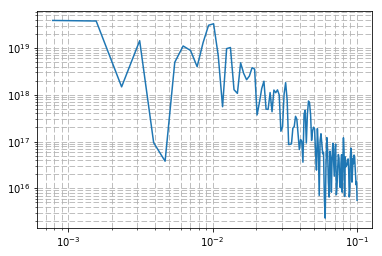

In [144]:
# Calculate spectra of 1 day and 5 day 
f_1day, Pxx_1day = sig.welch(sig.detrend(vh_1day),fs=1.)
#plt.loglog(f_1day,Pxx_1day)
f_5day, Pxx_5day = sig.welch(sig.detrend(vh_1day),fs=1/5)
plt.loglog(f_5day,Pxx_1day)
plt.grid(True, which="both", ls="--")

In [146]:
f_1day.max()

0.5

In [142]:
f_5day

array([ 0.        ,  0.00390625,  0.0078125 ,  0.01171875,  0.015625  ,
        0.01953125,  0.0234375 ,  0.02734375,  0.03125   ,  0.03515625,
        0.0390625 ,  0.04296875,  0.046875  ,  0.05078125,  0.0546875 ,
        0.05859375,  0.0625    ,  0.06640625,  0.0703125 ,  0.07421875,
        0.078125  ,  0.08203125,  0.0859375 ,  0.08984375,  0.09375   ,
        0.09765625,  0.1015625 ,  0.10546875,  0.109375  ,  0.11328125,
        0.1171875 ,  0.12109375,  0.125     ,  0.12890625,  0.1328125 ,
        0.13671875,  0.140625  ,  0.14453125,  0.1484375 ,  0.15234375,
        0.15625   ,  0.16015625,  0.1640625 ,  0.16796875,  0.171875  ,
        0.17578125,  0.1796875 ,  0.18359375,  0.1875    ,  0.19140625,
        0.1953125 ,  0.19921875,  0.203125  ,  0.20703125,  0.2109375 ,
        0.21484375,  0.21875   ,  0.22265625,  0.2265625 ,  0.23046875,
        0.234375  ,  0.23828125,  0.2421875 ,  0.24609375,  0.25      ,
        0.25390625,  0.2578125 ,  0.26171875,  0.265625  ,  0.26

In [147]:
f_5day.ndim

1